In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('../input/creditcard2/creditcard2.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(12421, 31)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df['Class'].value_counts()

0    12365
1       56
Name: Class, dtype: int64

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,12421.000000,12421.000000,12421.000000,12421.000000,12421.000000,12421.000000,12421.000000,12421.000000,12421.000000,12421.000000,...,12421.000000,12421.000000,12421.000000,12421.000000,12421.000000,12421.000000,12421.000000,12421.000000,12421.00000,12421.000000
mean,8502.025199,-0.221015,0.280246,0.876192,0.283193,-0.101265,0.134515,-0.141314,-0.037291,0.943163,...,-0.062324,-0.151169,-0.033763,0.016667,0.109627,0.052326,0.010132,0.000069,61.62907,0.004508
std,6582.786207,1.640211,1.328447,1.440346,1.493309,1.222491,1.309337,1.202559,1.248456,1.211150,...,0.906532,0.623138,0.499621,0.590061,0.427509,0.563887,0.404087,0.259656,175.84235,0.066996
min,0.000000,-27.670569,-34.607649,-24.667741,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.00000,0.000000
25%,2666.000000,-0.971734,-0.270414,0.417455,-0.628861,-0.703985,-0.622660,-0.603384,-0.182281,0.230943,...,-0.266599,-0.537963,-0.171218,-0.333311,-0.138251,-0.365751,-0.078302,-0.015331,5.35000,0.000000
50%,7241.000000,-0.325697,0.250711,0.957771,0.209194,-0.189767,-0.150792,-0.103559,0.015020,0.925301,...,-0.129502,-0.121070,-0.044243,0.070096,0.148748,-0.010547,-0.001581,0.015683,15.50000,0.000000
75%,13495.000000,1.162650,0.877737,1.611815,1.164226,0.342145,0.505630,0.423546,0.266584,1.618678,...,0.020965,0.234191,0.073728,0.399672,0.385398,0.400355,0.104064,0.071823,50.00000,0.000000
max,21766.000000,1.960497,10.558600,4.101716,11.927512,34.099309,21.393069,34.303177,7.414638,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.43000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12421 entries, 0 to 12420
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    12421 non-null  int64  
 1   V1      12421 non-null  float64
 2   V2      12421 non-null  float64
 3   V3      12421 non-null  float64
 4   V4      12421 non-null  float64
 5   V5      12421 non-null  float64
 6   V6      12421 non-null  float64
 7   V7      12421 non-null  float64
 8   V8      12421 non-null  float64
 9   V9      12421 non-null  float64
 10  V10     12421 non-null  float64
 11  V11     12421 non-null  float64
 12  V12     12421 non-null  float64
 13  V13     12421 non-null  float64
 14  V14     12421 non-null  float64
 15  V15     12421 non-null  float64
 16  V16     12421 non-null  float64
 17  V17     12421 non-null  float64
 18  V18     12421 non-null  float64
 19  V19     12421 non-null  float64
 20  V20     12421 non-null  float64
 21  V21     12421 non-null  float64
 22

In [9]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
df=df.drop(['Time'],axis=1)
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [11]:
from sklearn.preprocessing import StandardScaler
df['New_amount']=StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df=df.drop(['Amount'],axis=1)
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'New_amount'],
      dtype='object')

In [12]:
df['New_amount'].head()


0    0.500417
1   -0.335195
2    1.803000
3    0.351869
4    0.047550
Name: New_amount, dtype: float64

In [13]:
x=df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'New_amount']]
y=df[['Class']]

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8694, 29)
(3727, 29)
(8694, 1)
(3727, 1)


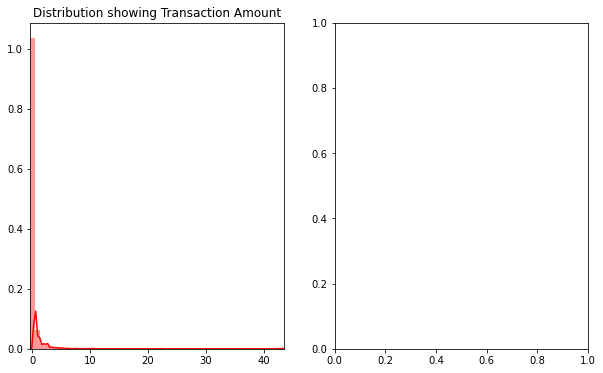

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))


amount_val = df['New_amount'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution showing Transaction Amount')
ax[0].set_xlim([min(amount_val), max(amount_val)])
plt.show()

In [16]:
my_tab = pd.crosstab(index=df["Class"],columns="count") 
print(my_tab)

col_0  count
Class       
0      12365
1         56


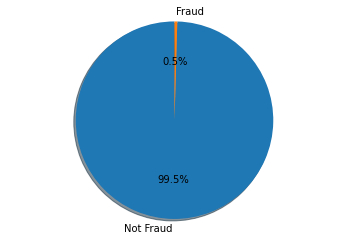

In [17]:
labels = 'Not Fraud', 'Fraud'
sizes = [my_tab["count"][0], my_tab["count"][1]]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True,startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

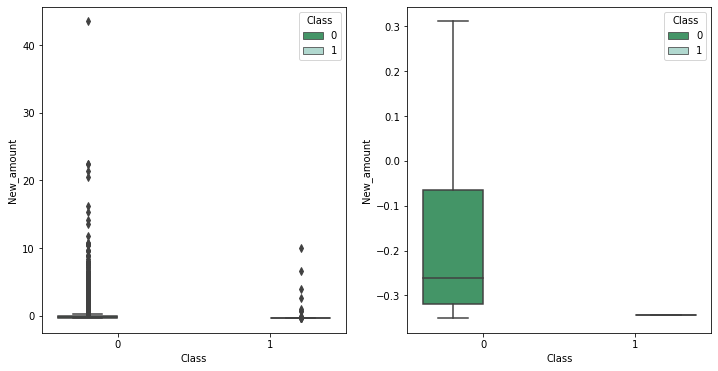

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="New_amount", hue="Class",data=df, palette="BuGn_r",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="New_amount", hue="Class",data=df, palette="BuGn_r",showfliers=False)
plt.show();

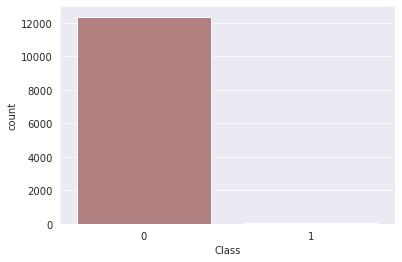

In [22]:
sns.set_style("darkgrid")
sns.countplot(x='Class',data=df,palette="pink")

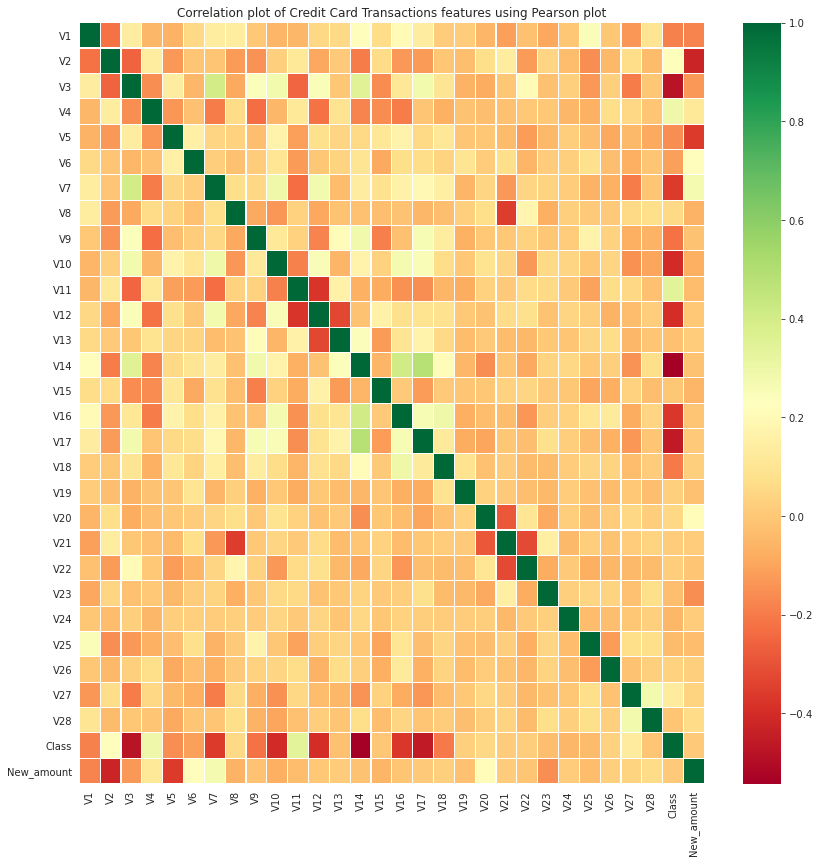

In [23]:
plt.figure(figsize = (14,14))
plt.title('Correlation plot of Credit Card Transactions features using Pearson plot')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="RdYlGn")
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8694, 29)
(3727, 29)
(8694, 1)
(3727, 1)


In [25]:
model=LogisticRegression()
model.fit(x_train,y_train)
lr_pred=model.predict(x_test)
print('Logistic Regression accuracy: ',metrics.accuracy_score(lr_pred,y_test))
print('Logistic Regression precision: ',metrics.precision_score(lr_pred,y_test))
print('Logistic Regression recall: ',metrics.recall_score(lr_pred,y_test))


Logistic Regression accuracy:  0.9983901261067883
Logistic Regression precision:  0.7222222222222222
Logistic Regression recall:  0.9285714285714286


In [32]:
from sklearn.metrics import classification_report
model=DecisionTreeClassifier(criterion="entropy",max_depth=5)
model.fit(x_train,y_train)
dt_pred=model.predict(x_test)
print('Decision tree accuracy: ',metrics.accuracy_score(dt_pred,y_test))
print('Decision tree precision: ',metrics.precision_score(dt_pred,y_test))
print('Decision tree recall: ',metrics.recall_score(dt_pred,y_test))
print(classification_report(dt_pred,y_test))

Decision tree accuracy:  0.9965119398980413
Decision tree precision:  0.8333333333333334
Decision tree recall:  0.6
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3702
           1       0.83      0.60      0.70        25

    accuracy                           1.00      3727
   macro avg       0.92      0.80      0.85      3727
weighted avg       1.00      1.00      1.00      3727



In [33]:
model=GaussianNB()
model.fit(x_train,y_train)
nb_pred=model.predict(x_test)
print('Naive Bayes accuracy: ',metrics.accuracy_score(nb_pred,y_test))
print('Naive Bayes precision: ',metrics.precision_score(nb_pred,y_test))
print('Naive Bayes recall: ',metrics.recall_score(nb_pred,y_test))
print(classification_report(nb_pred,y_test))

Naive Bayes accuracy:  0.9855111349610947
Naive Bayes precision:  0.8333333333333334
Naive Bayes recall:  0.22727272727272727
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3661
           1       0.83      0.23      0.36        66

    accuracy                           0.99      3727
   macro avg       0.91      0.61      0.67      3727
weighted avg       0.98      0.99      0.98      3727



In [34]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(x_train, y_train)
#At last we need to make prediction. It can be done with the help of following script −

y_pred = model.predict(x_test)
print('KNN accuracy: ',metrics.accuracy_score(y_pred,y_test))
print('KNN precision: ',metrics.precision_score(y_pred,y_test))
print('KNN recall: ',metrics.recall_score(y_pred,y_test))
print(classification_report(y_pred,y_test))


KNN accuracy:  0.9978535014757177
KNN precision:  0.5555555555555556
KNN recall:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3717
           1       0.56      1.00      0.71        10

    accuracy                           1.00      3727
   macro avg       0.78      1.00      0.86      3727
weighted avg       1.00      1.00      1.00      3727



In [35]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
rcf_pred=model.predict(x_test)
print('RCF accuracy: ',metrics.accuracy_score(rcf_pred,y_test))
print('RCF precision: ',metrics.precision_score(rcf_pred,y_test))
print('RCF recall: ',metrics.recall_score(rcf_pred,y_test))
print(classification_report(rcf_pred,y_test))

RCF accuracy:  0.9986584384223236
RCF precision:  0.7222222222222222
RCF recall:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3714
           1       0.72      1.00      0.84        13

    accuracy                           1.00      3727
   macro avg       0.86      1.00      0.92      3727
weighted avg       1.00      1.00      1.00      3727



In [36]:
from sklearn.svm import SVC
from sklearn import svm
model = svm.SVC(kernel='rbf')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('SVM accuracy: ',metrics.accuracy_score(y_pred,y_test))
print('SVM precision: ',metrics.precision_score(y_pred,y_test))
print('SVM recall: ',metrics.recall_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

NameError: name 'svm' is not defined